In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pylab inline

# pandas settings
pd.set_option('max_colwidth',1000)
pd.set_option('max_seq_items','none')
pd.set_option('display.max_colwidth',50)

In [2]:
# import data as dtype=object to avoid NaN/Float conversion of IDs
authors = pd.read_csv('out/csv/authors.csv', dtype=object)
characters = pd.read_csv('out/csv/characters.csv', dtype=object)
creators = pd.read_csv('out/csv/creators.csv', dtype=object)
images = pd.read_csv('out/csv/images.csv', dtype=object)
kashira = pd.read_csv('out/csv/kashira.csv', dtype=object)
performances = pd.read_csv('out/csv/performances.csv', dtype=object)
performers = pd.read_csv('out/csv/performers.csv', dtype=object)
plays = pd.read_csv('out/csv/plays.csv', dtype=object)
productions = pd.read_csv('out/csv/productions.csv', dtype=object)
pscenes = pd.read_csv('out/csv/pscenes.csv', dtype=object)
spucks = pd.read_csv('out/csv/spucks.csv', dtype=object)
tags = pd.read_csv('out/csv/tags.csv', dtype=object)

In [3]:
online_vs_total = pd.read_csv('stats/online_vs_total.csv')

In [4]:
online_vs_total['online/total images'] = (online_vs_total['online images']/online_vs_total['total images'])

In [5]:
online_vs_total = online_vs_total.replace(np.nan, 0)

In [6]:
online_vs_total['online images'] = online_vs_total['online images'].astype(int)
online_vs_total['total images'] = online_vs_total['total images'].astype(int)

In [8]:
item_total = sum(online_vs_total['items'])

In [9]:
online_vs_total['items/total'] = (online_vs_total['items']/item_total)

In [10]:
online_vs_total

,items,online images,total images,online/total images,items/total
authors,123,0,0,0.000000,0.014900
spucks,1625,0,0,0.000000,0.196850
characters,2107,12460,17006,0.732683,0.255239
kashira,129,12364,17019,0.726482,0.015627
performances,931,18533,18533,1.000000,0.112780
performers,184,10442,14893,0.701135,0.022290
plays,178,13504,18791,0.718642,0.021563
productions,293,13477,18750,0.718773,0.035494
pscenes,2609,13010,18000,0.722778,0.316051
tags,76,5668,8941,0.633934,0.009207


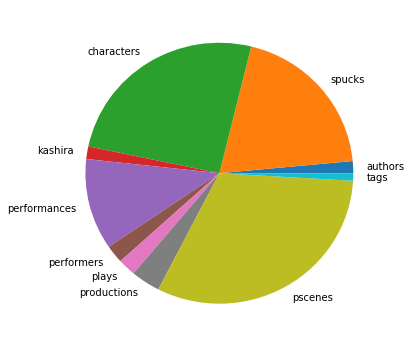

In [95]:
items_df = online_vs_total[['items']]

pylab.rcParams['figure.figsize'] = (6, 6)
items_pie = plt.pie(items_df, labels=items_df.index)

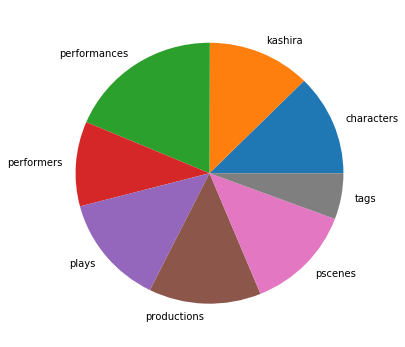

In [94]:
online_images_df = online_vs_total[['online images']]
online_images_df = online_images_df.loc[(online_images_df!=0).any(axis=1)]

pylab.rcParams['figure.figsize'] = (6, 6)
online_images_pie = plt.pie(online_images_df, labels=online_images_df.index)

Populating the interactive namespace from numpy and matplotlib


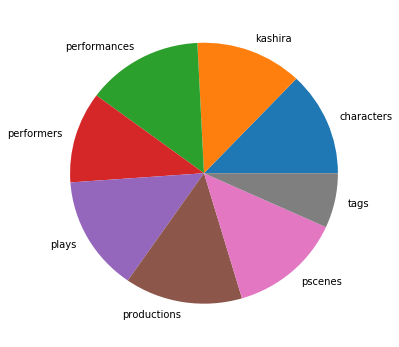

In [93]:
total_images_df = online_vs_total[['total images']]
total_images_df = total_images_df.loc[(total_images_df!=0).any(axis=1)]

pylab.rcParams['figure.figsize'] = (6, 6)
total_images_pie = plt.pie(total_images_df, labels=online_images_df.index)

In [81]:
authors_playcount = authors.drop('dates',1).drop('reference',1).drop('sort_ja',1)
authors_playcount['playcount'] = authors_playcount['play_id'].astype(str).apply(lambda x: len(x.replace('[','').replace(']','').split(",")))
prolific_authors = authors_playcount.sort_values(by='playcount', ascending=False)[:20]

In [86]:
prolific_authors = prolific_authors[['label_eng', 'playcount']]
prolific_authors.set_index('label_eng', inplace=True)
prolific_authors.head()

,playcount
label_eng,
Chikamatsu Monzaemon,26
Miyoshi Shōraku,21
Chikamatsu Hanji,14
Takemoto Saburobei,11
Wakatake Fuemi,9


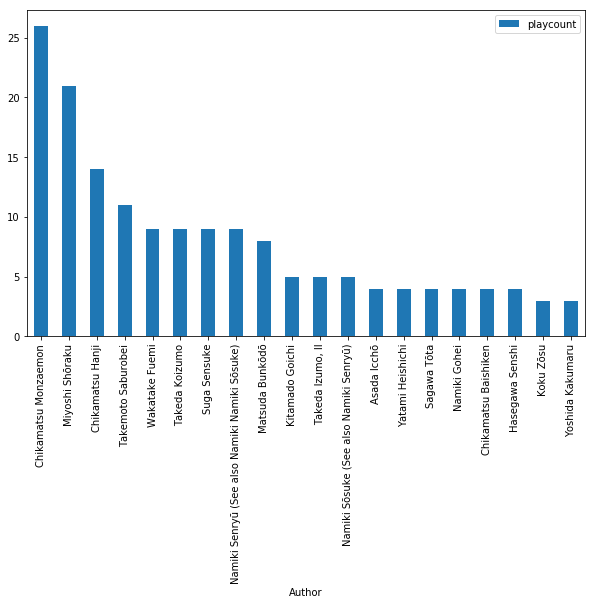

In [104]:
pylab.rcParams['figure.figsize'] = (10, 6)
prolific_authors_bar = prolific_authors.plot.bar().set_xlabel('Author')

In [121]:
characters_playcount = characters.drop('authority_control',1).drop('sort_ja',1).set_index('id')
characters_playcount.head()

,label_eng,label_ja,label_ka,play_id,image_id
id,,,,,
1,Farmer,Oyaji,おやじ,[162],[56170]
2,Farmer's wife,Nyōbō,女房,[162],NaN
3,"Magotaro, a horse","Magotarō, Uma",孫太郎（馬）,[162],NaN
4,Local governor,Odaikan,お代官,[162],NaN
5,Local governor's assistant,Odaikan no kobun,お代官のこぶん,[162],NaN


In [128]:
characters_playcount['playcount'] = characters_playcount['play_id'].astype(str).apply(lambda x: len(x.replace('[','').replace(']','').split(",")))
characters_playcount = characters_playcount.sort_values(by='playcount', ascending=False)

muliplay_characters = characters_playcount[characters_playcount['playcount'] == 2]
muliplay_characters.head()

,label_eng,label_ja,label_ka,play_id,image_id,playcount
id,,,,,,
2168,Chohakkai,Chohakkai,猪八戒,"[139, 51]","[12261, 12262, 12263, 12264, 12268, 12271, 122...",2
332,Gyumao,Gyūmaō,牛魔王,"[139, 51]",NaN,2
2165,"Inkaizan, in fact Chinkozui",Inkaizan jitsuwa Chinkōzui,殷開山 実は 陳光蕊,"[139, 51]",[12236],2
718,Barrier guards,Bansotsu,番卒,"[31, 49]","[59341, 59342, 59354, 59360, 59367, 59381, 593...",2
945,Monkey trainer,Saruhiki,猿曳,"[136, 176]",NaN,2


In [142]:
plays_connected_by_characters = muliplay_characters['play_id'].unique()
plays_connected_by_characters = str(plays_connected_by_characters).replace('[','').replace(']','').replace("'",'').replace(',','').replace('\n','')

In [143]:
plays_connected_by_characters.split(" ")

['139',
 '51',
 '31',
 '49',
 '136',
 '176',
 '65',
 '89',
 '97',
 '116',
 '25',
 '147',
 '64',
 '165',
 '63',
 '143',
 '165',
 '64',
 '138',
 '74',
 '64',
 '166',
 '100',
 '129',
 '62',
 '91']